# Tipped Wage Report: Outlier Detection

#### Analyst: Dhruv Singh <br> Report Name: Tipped Wage Report, Part 2 <br> Report Quarter, Year: Q2 2021 <br> Date Updated: 08/18/2021

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cleaned Data

In [2]:
combined = pd.read_csv('1_cleaned_data.csv')

In [3]:
combined.head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source
0,P & P CORPORATION,272.0,5.0,1360.0,19002.0,74.86,69.86,ESSP
1,P & P CORPORATION,255.0,5.0,1275.0,18022.0,75.67,70.67,ESSP
2,P & P CORPORATION,66.0,5.0,330.0,2954.0,49.76,44.76,ESSP
3,P & P CORPORATION,335.0,5.0,1677.0,20859.0,67.27,62.27,ESSP
4,P & P CORPORATION,387.0,5.0,1935.0,11552.0,34.85,29.85,ESSP


In [4]:
# for our purposes, using the above rule to guide outlier detection will prove useful

In [5]:
# creating quarterly_salary, hours_per_week, and calculated_salary columns
combined['quarterly_salary'] = combined['total_wage'] + combined['total_tips'] # this column can exceed calculated salary
combined['hours_per_week'] = combined['hours_worked'] / 12
combined['calculated_salary'] = combined['hours_worked'] * combined['hourly_rate_emp']

### Exploratory Data Analysis

In [6]:
combined.head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,calculated_salary
0,P & P CORPORATION,272.0,5.0,1360.0,19002.0,74.86,69.86,ESSP,20362.0,22.666667,1360.0
1,P & P CORPORATION,255.0,5.0,1275.0,18022.0,75.67,70.67,ESSP,19297.0,21.250000,1275.0
2,P & P CORPORATION,66.0,5.0,330.0,2954.0,49.76,44.76,ESSP,3284.0,5.500000,330.0
3,P & P CORPORATION,335.0,5.0,1677.0,20859.0,67.27,62.27,ESSP,22536.0,27.916667,1675.0
4,P & P CORPORATION,387.0,5.0,1935.0,11552.0,34.85,29.85,ESSP,13487.0,32.250000,1935.0


In [7]:
combined['delta'] = abs(combined['total_wage'] - combined['calculated_salary'])

In [8]:
delta1 = combined['delta'].mean()
delta1

42268.20904294595

#### Bar Charts: Total Wages, Calculated Salary

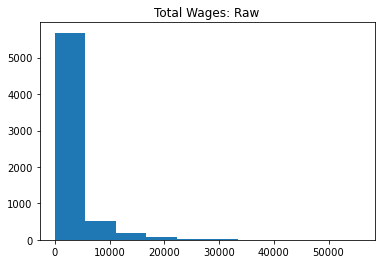

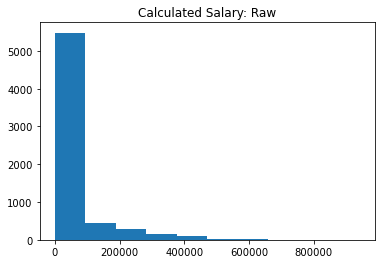

In [9]:
# comparing total wages
plt.hist(combined['total_wage'])
# plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.title('Total Wages: Raw')
plt.show()

# and calculated salary
plt.hist(combined['calculated_salary'])
plt.title('Calculated Salary: Raw')
plt.show()

#### Box Plots: Total Wages, Total Tips

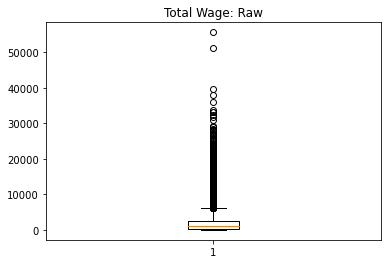

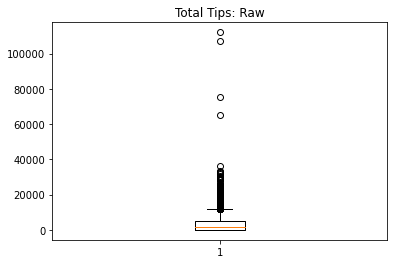

In [10]:
# boxplot: total wages
fig1, ax1 = plt.subplots()
ax1.set_title('Total Wage: Raw')
ax1.boxplot(combined['total_wage'])
plt.show()

# boxplot: total tips
fig1, ax1 = plt.subplots()
ax1.set_title('Total Tips: Raw')
ax1.boxplot(combined['total_tips'])
plt.show()

#### Box Plots: Hourly Rate Avg, Tips Avg

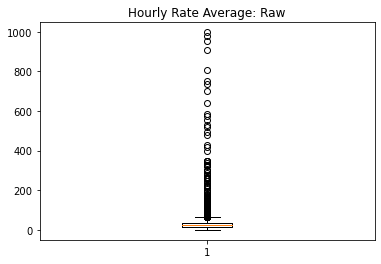

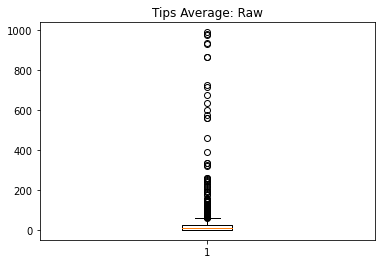

In [11]:
# boxplot: hourly wage avg
fig1, ax1 = plt.subplots()
ax1.set_title('Hourly Rate Average: Raw')
ax1.boxplot(combined['hourly_rate_avg'])
plt.show()

# boxplot: tips avg
fig1, ax1 = plt.subplots()
ax1.set_title('Tips Average: Raw')
ax1.boxplot(combined['tips_avg'])
plt.show()

#### Summary Statistics

In [12]:
# checking ranges for hours worked
combined[['hours_worked', 'hourly_rate_emp', 'total_wage', 'total_tips', 'hourly_rate_avg', 'tips_avg']].describe().round(2)

,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg
count,6510.00,6510.00,6510.00,6510.00,6510.00,6510.00
mean,231.62,120.08,2543.66,3586.74,29.51,17.98
std,204.79,222.68,4117.59,5335.30,45.43,43.72
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,54.00,5.00,331.50,185.25,14.00,0.75
50%,184.00,12.00,1084.10,1504.75,22.40,10.03
75%,370.00,23.54,2642.50,4932.75,35.03,25.06
max,990.00,975.00,55620.00,112101.00,997.20,990.33


#### Box Plots: Hours Worked, Wage Rates

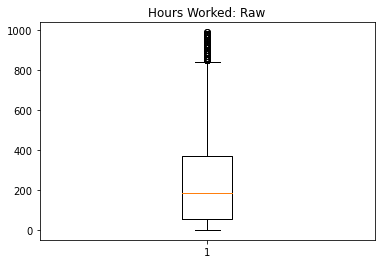

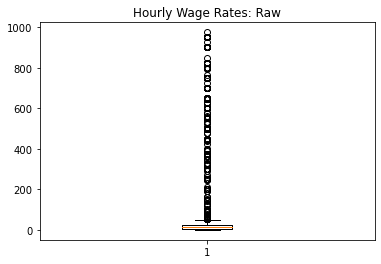

In [13]:
# boxplot: hours
fig1, ax1 = plt.subplots()
ax1.set_title('Hours Worked: Raw')
ax1.boxplot(combined['hours_worked'])
plt.show()

# boxplot: wage rates
fig1, ax1 = plt.subplots()
ax1.set_title('Hourly Wage Rates: Raw')
ax1.boxplot(combined['hourly_rate_emp'])
plt.show()

#### Scatter: Hourly Wage vs. Hours Worked

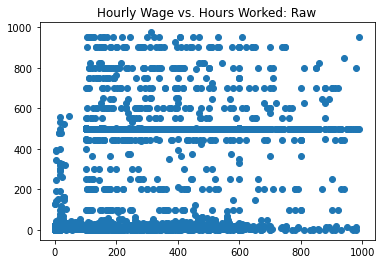

In [14]:
# should consider a binned scatter plot
plt.scatter(combined['hours_worked'], combined['hourly_rate_emp'])
plt.title('Hourly Wage vs. Hours Worked: Raw')
plt.show()

## Exception Handling:

### Golden Standard: Total Wages = Hours * Wage Rate

#### # Checks for Wage Rates

##### a. Hard Check: total wages < wage rate

In [15]:
# if someone has worked more than 1 hour, total wage > hourly wage must be true

In [16]:
# checking for outliers
combined[(combined['hours_worked'] >= 1) & (combined['total_wage'] < combined['hourly_rate_emp'])].sort_values(by = ['hourly_rate_emp'], ascending=False).head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,calculated_salary,delta
1636,REMARKABLE BREADS LLC,300.0,950.0,285.0,515.0,2.67,1.72,ESSP,800.0,25.000000,285000.0,284715.0
1646,REMARKABLE BREADS LLC,530.0,950.0,507.0,711.0,2.30,1.34,ESSP,1218.0,44.166667,503500.0,502993.0
1651,REMARKABLE BREADS LLC,990.0,950.0,943.0,1576.0,2.54,1.59,ESSP,2519.0,82.500000,940500.0,939557.0
1655,REMARKABLE BREADS LLC,450.0,950.0,430.0,619.0,2.33,1.38,ESSP,1049.0,37.500000,427500.0,427070.0
1918,HBGT LLC,610.0,950.0,577.0,2068.0,4.34,3.39,ESSP,2645.0,50.833333,579500.0,578923.0


In [17]:
# creating outlier flag 1 for wages
combined['wages_outlier_flag1'] = 0
combined.loc[(combined['hours_worked'] >= 1) & (combined['total_wage'] < combined['hourly_rate_emp']), 'wages_outlier_flag1'] = 1

# tabulating number of flagged rows
combined['wages_outlier_flag1'].value_counts()

0    5901
1     609
Name: wages_outlier_flag1, dtype: int64

In [18]:
# updating wage rate for flagged rows: dividing by 100
combined.loc[combined['wages_outlier_flag1'] == 1, 'hourly_rate_emp'] *= 0.01

In [19]:
# recalculating calculated salary and delta
combined['calculated_salary'] = combined['hours_worked'] * combined['hourly_rate_emp']
combined['delta'] = abs(combined['total_wage'] - combined['calculated_salary'])

In [20]:
# checking update for flagged rows
combined[combined['wages_outlier_flag1'] == 1].head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,calculated_salary,delta,wages_outlier_flag1
9,THE PRIME RIB INC,550.0,5.00,275.0,2239.0,4.57,4.07,ESSP,2514.0,45.833333,2750.0,2475.0,1
11,THE PRIME RIB INC,700.0,5.75,38.0,325.0,0.52,0.46,ESSP,363.0,58.333333,4025.0,3987.0,1
16,THE PRIME RIB INC,190.0,5.00,95.0,1129.0,6.44,5.94,ESSP,1224.0,15.833333,950.0,855.0,1
48,BILLIKEN CORPORATION,680.0,6.25,424.0,851.0,1.88,1.25,ESSP,1275.0,56.666667,4250.0,3826.0,1
52,BILLIKEN CORPORATION,230.0,6.25,146.0,279.0,1.85,1.21,ESSP,425.0,19.166667,1437.5,1291.5,1


##### b. Soft check: Calculated Salary > 100 * Total Wages

In [21]:
# for rows where calculated salary is more than 100 times the total wage
# we can flag the rows as outliers, and update accordingly

In [22]:
# checking for outliers, and excluding rows updated by flag 1
combined[(combined['hours_worked'] >= 1) & (combined['calculated_salary'] >= 100*combined['total_wage']) & (combined['wages_outlier_flag1'] != 1)].sort_values(by = ['hourly_rate_emp'], ascending=False).head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,calculated_salary,delta,wages_outlier_flag1
1630,REMARKABLE BREADS LLC,314.0,975.0,3058.0,5156.0,26.16,16.42,ESSP,8214.0,26.166667,306150.0,303092.0,0
2255,CMSA LLC,406.0,950.0,3849.0,6530.0,25.56,16.08,ESSP,10379.0,33.833333,385700.0,381851.0,0
1631,REMARKABLE BREADS LLC,155.0,950.0,1470.0,2205.0,23.71,14.23,ESSP,3675.0,12.916667,147250.0,145780.0,0
1634,REMARKABLE BREADS LLC,322.0,950.0,3058.0,4889.0,24.68,15.18,ESSP,7947.0,26.833333,305900.0,302842.0,0
1640,REMARKABLE BREADS LLC,124.0,950.0,1177.0,1816.0,24.14,14.65,ESSP,2993.0,10.333333,117800.0,116623.0,0


In [23]:
# creating outlier flag 2 for wages
combined['wages_outlier_flag2'] = 0
combined.loc[(combined['hours_worked'] >= 1) & (combined['calculated_salary'] >= 100*combined['total_wage']) & (combined['wages_outlier_flag1'] != 1), 'wages_outlier_flag2'] = 1

# tabulating number of flagged rows
combined['wages_outlier_flag2'].value_counts()

0    6162
1     348
Name: wages_outlier_flag2, dtype: int64

In [24]:
# updating wage rate for flagged rows: dividing by 100
combined.loc[combined['wages_outlier_flag2'] == 1, 'hourly_rate_emp'] *= 0.01

In [25]:
# recalculating calculated salary and delta
combined['calculated_salary'] = combined['hours_worked'] * combined['hourly_rate_emp']
combined['delta'] = abs(combined['total_wage'] - combined['calculated_salary'])

In [26]:
# checking update for flagged rows
combined[combined['wages_outlier_flag2'] == 1].head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,calculated_salary,delta,wages_outlier_flag1,wages_outlier_flag2
12,THE PRIME RIB INC,214.0,5.00,1069.0,8595.0,45.16,40.16,ESSP,9664.0,17.833333,1070.0,1.0,0,1
17,THE PRIME RIB INC,238.0,5.75,1368.0,7127.0,35.69,29.95,ESSP,8495.0,19.833333,1368.5,0.5,0,1
57,BILLIKEN CORPORATION,173.0,6.00,1038.0,1321.0,13.64,7.64,ESSP,2359.0,14.416667,1038.0,0.0,0,1
59,BILLIKEN CORPORATION,132.0,6.00,792.0,943.0,13.14,7.14,ESSP,1735.0,11.000000,792.0,0.0,0,1
72,SPRING VALLEY ENTERPRISES,436.0,5.00,2179.0,9650.0,27.13,22.13,ESSP,11829.0,36.333333,2180.0,1.0,0,1


##### c. Calculated Salary > max(Total Wages)

In [27]:
# trimming calculated salary down to the level of total wages
# while this rule encompasses rule b. above, it helps to have rule b. to identify more granular details

In [28]:
# checking for outliers
combined[(combined['hours_worked'] >= 1) & (combined['calculated_salary'] >= max(combined['total_wage'])) & (combined['wages_outlier_flag1'] != 1) & (combined['wages_outlier_flag2'] != 1)].sort_values(by = ['hourly_rate_emp'], ascending=False).head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,calculated_salary,delta,wages_outlier_flag1,wages_outlier_flag2
1644,REMARKABLE BREADS LLC,171.0,950.0,1626.0,2704.0,25.32,15.81,ESSP,4330.0,14.250000,162450.0,160824.0,0,0
1633,REMARKABLE BREADS LLC,147.0,950.0,1398.0,2453.0,26.20,16.69,ESSP,3851.0,12.250000,139650.0,138252.0,0,0
1654,REMARKABLE BREADS LLC,114.0,950.0,1084.0,1667.0,24.13,14.62,ESSP,2751.0,9.500000,108300.0,107216.0,0,0
1653,REMARKABLE BREADS LLC,189.0,950.0,1797.0,2754.0,24.08,14.57,ESSP,4551.0,15.750000,179550.0,177753.0,0,0
1645,REMARKABLE BREADS LLC,406.0,950.0,3861.0,5988.0,24.26,14.75,ESSP,9849.0,33.833333,385700.0,381839.0,0,0


In [29]:
# creating outlier flag 3 for wages, excluding rows updated by flags 1 and 2
combined['wages_outlier_flag3'] = 0
combined.loc[(combined['hours_worked'] >= 1) & (combined['calculated_salary'] >= max(combined['total_wage'])) & (combined['wages_outlier_flag1'] != 1) & (combined['wages_outlier_flag2'] != 1), 'wages_outlier_flag3'] = 1

# tabulating number of flagged rows
combined['wages_outlier_flag3'].value_counts()

0    6130
1     380
Name: wages_outlier_flag3, dtype: int64

In [30]:
# updating wage rate for flagged rows: dividing by 100
combined.loc[combined['wages_outlier_flag3'] == 1, 'hourly_rate_emp'] *= 0.01

In [31]:
# recalculating calculated salary and delta
combined['calculated_salary'] = combined['hours_worked'] * combined['hourly_rate_emp']
combined['delta'] = abs(combined['total_wage'] - combined['calculated_salary'])

In [32]:
# checking update for flagged rows
combined[combined['wages_outlier_flag3'] == 1].head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,calculated_salary,delta,wages_outlier_flag1,wages_outlier_flag2,wages_outlier_flag3
8,THE PRIME RIB INC,472.0,5.00,2388.0,16685.0,40.41,35.35,ESSP,19073.0,39.333333,2360.0,28.0,0,0,1
10,THE PRIME RIB INC,528.0,5.00,2722.0,18104.0,39.44,34.29,ESSP,20826.0,44.000000,2640.0,82.0,0,0,1
13,THE PRIME RIB INC,468.0,5.75,2702.0,12909.0,33.36,27.58,ESSP,15611.0,39.000000,2691.0,11.0,0,0,1
14,THE PRIME RIB INC,508.0,5.00,2581.0,18597.0,41.69,36.61,ESSP,21178.0,42.333333,2540.0,41.0,0,0,1
15,THE PRIME RIB INC,497.0,5.00,2542.0,17463.0,40.25,35.14,ESSP,20005.0,41.416667,2485.0,57.0,0,0,1


##### d. Delta > 1000, and wage rate > 100

In [33]:
# Objective: to narrow the delta, as near 0 as possible

In [34]:
# checking for outliers
combined[(combined['delta'] > 1000) & (combined['hourly_rate_emp'] >= 100) & (combined['wages_outlier_flag1'] != 1) & (combined['wages_outlier_flag2'] != 1) & (combined['wages_outlier_flag3'] != 1)].sort_values(by = ['hourly_rate_emp'], ascending=False).head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,calculated_salary,delta,wages_outlier_flag1,wages_outlier_flag2,wages_outlier_flag3
3249,Gordon Restaurant Group - Chevy Chase,104.0,500.0,522.0,2247.0,26.63,21.61,ESSP,2769.0,8.666667,52000.0,51478.0,0,0,0
3575,Rumis DC LLC,110.0,500.0,574.0,1677.0,20.46,15.25,ESSP,2251.0,9.166667,55000.0,54426.0,0,0,0
2215,Roof top DC LLC,105.0,500.0,726.0,1736.0,23.45,16.53,ESSP,2462.0,8.750000,52500.0,51774.0,0,0,0
1219,MINTWOOD PLACE,142.0,300.0,1845.0,435.0,16.06,3.06,ESSP,2280.0,11.833333,42600.0,40755.0,0,0,0
1176,DAS ETHIOPIAN INC,127.0,300.0,1645.0,624.0,17.87,4.91,ESSP,2269.0,10.583333,38100.0,36455.0,0,0,0


In [35]:
# creating outlier flag 4 for wages, excluding rows updated by flags 1, 2, and 3
combined['wages_outlier_flag4'] = 0
combined.loc[(combined['delta'] > 1000) & (combined['hourly_rate_emp'] >= 100) & (combined['wages_outlier_flag1'] != 1) & (combined['wages_outlier_flag2'] != 1) & (combined['wages_outlier_flag3'] != 1), 'wages_outlier_flag4'] = 1

# tabulating number of flagged rows
combined['wages_outlier_flag4'].value_counts()

0    6458
1      52
Name: wages_outlier_flag4, dtype: int64

In [36]:
# updating wage rate for flagged rows: dividing by 100
combined.loc[combined['wages_outlier_flag4'] == 1, 'hourly_rate_emp'] *= 0.01

In [37]:
# recalculating calculated salary and delta
combined['calculated_salary'] = combined['hours_worked'] * combined['hourly_rate_emp']
combined['delta'] = abs(combined['total_wage'] - combined['calculated_salary'])

In [38]:
# checking update for flagged rows
combined[combined['wages_outlier_flag4'] == 1].head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,calculated_salary,delta,wages_outlier_flag1,wages_outlier_flag2,wages_outlier_flag3,wages_outlier_flag4
316,CEC INC,250.0,1.0,275.0,100.0,1.50,0.40,ESSP,375.0,20.833333,250.0,25.0,0,0,0,1
1176,DAS ETHIOPIAN INC,127.0,3.0,1645.0,624.0,17.87,4.91,ESSP,2269.0,10.583333,381.0,1264.0,0,0,0,1
1219,MINTWOOD PLACE,142.0,3.0,1845.0,435.0,16.06,3.06,ESSP,2280.0,11.833333,426.0,1419.0,0,0,0,1
1301,1541 Q LLC,361.0,1.0,3968.0,6855.0,29.98,18.99,ESSP,10823.0,30.083333,361.0,3607.0,0,0,0,1
1405,BAR DI BARI LLC,219.0,1.0,2407.0,2464.0,22.24,11.25,ESSP,4871.0,18.250000,219.0,2188.0,0,0,0,1


##### e. Delta > 1000, and wage rate < 0.2

In [39]:
# checking for outliers
combined[(combined['delta'] > 1000) & (combined['hourly_rate_emp'] < 0.2) & (combined['wages_outlier_flag1'] != 1) & (combined['wages_outlier_flag2'] != 1) & (combined['wages_outlier_flag3'] != 1) & (combined['wages_outlier_flag4'] != 1)].sort_values(by = ['hourly_rate_emp'], ascending=False).head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,calculated_salary,delta,wages_outlier_flag1,wages_outlier_flag2,wages_outlier_flag3,wages_outlier_flag4
853,PAC CONCEPTS INC,247.0,0.0,2455.00,17983.00,82.74,72.81,ESSP,20438.00,20.583333,0.0,2455.00,0,0,0,0
1036,IRVING RESTAURANT GROUP,287.0,0.0,2889.00,1436.00,15.07,5.00,ESSP,4325.00,23.916667,0.0,2889.00,0,0,0,0
4639,"ANNABELLE, LLC",0.0,0.0,18889.79,18889.79,0.00,0.00,Manual,37779.58,0.000000,0.0,18889.79,0,0,0,0
4642,"ANNABELLE, LLC",0.0,0.0,2489.72,2489.72,0.00,0.00,Manual,4979.44,0.000000,0.0,2489.72,0,0,0,0
4647,"ANNABELLE, LLC",0.0,0.0,12258.28,12258.28,0.00,0.00,Manual,24516.56,0.000000,0.0,12258.28,0,0,0,0


In [40]:
# creating outlier flag 5 for wages, excluding rows updated by flags 1, 2, 3, and 4
combined['wages_outlier_flag5'] = 0
combined.loc[(combined['delta'] > 1000) & (combined['hourly_rate_emp'] < 0.2) & (combined['wages_outlier_flag1'] != 1) & (combined['wages_outlier_flag2'] != 1) & (combined['wages_outlier_flag3'] != 1) & (combined['wages_outlier_flag4'] != 1), 'wages_outlier_flag5'] = 1

# tabulating number of flagged rows
combined['wages_outlier_flag5'].value_counts()

0    6302
1     208
Name: wages_outlier_flag5, dtype: int64

In [41]:
# updating wage rate for flagged rows: multiplying by 100
combined.loc[combined['wages_outlier_flag5'] == 1, 'hourly_rate_emp'] *= 100

In [42]:
# recalculating calculated salary and delta
combined['calculated_salary'] = combined['hours_worked'] * combined['hourly_rate_emp']
combined['delta'] = abs(combined['total_wage'] - combined['calculated_salary'])

In [43]:
# checking update for flagged rows
combined[combined['wages_outlier_flag5'] == 1].head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,calculated_salary,delta,wages_outlier_flag1,wages_outlier_flag2,wages_outlier_flag3,wages_outlier_flag4,wages_outlier_flag5
853,PAC CONCEPTS INC,247.0,0.0,2455.0,17983.0,82.74,72.81,ESSP,20438.0,20.583333,0.0,2455.0,0,0,0,0,1
1036,IRVING RESTAURANT GROUP,287.0,0.0,2889.0,1436.0,15.07,5.00,ESSP,4325.0,23.916667,0.0,2889.0,0,0,0,0,1
1177,DAS ETHIOPIAN INC,107.0,0.0,1068.0,725.0,16.76,6.78,ESSP,1793.0,8.916667,0.0,1068.0,0,0,0,0,1
1197,MINTWOOD PLACE,312.0,0.0,3124.0,12062.0,48.67,38.66,ESSP,15186.0,26.000000,0.0,3124.0,0,0,0,0,1
1200,MINTWOOD PLACE,534.0,0.0,5326.0,10467.0,29.57,19.60,ESSP,15793.0,44.500000,0.0,5326.0,0,0,0,0,1


##### f. Delta > 1000, and (0.2 < wage rate < 1)

In [44]:
# checking for outliers
combined[(combined['delta'] > 1000) & (combined['hourly_rate_emp'] >= 0.2) & (combined['hourly_rate_emp'] < 1) & (combined['wages_outlier_flag1'] != 1) & (combined['wages_outlier_flag2'] != 1) & (combined['wages_outlier_flag3'] != 1) & (combined['wages_outlier_flag4'] != 1) & (combined['wages_outlier_flag5'] != 1)].sort_values(by = ['hourly_rate_emp'], ascending=False).head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,calculated_salary,delta,wages_outlier_flag1,wages_outlier_flag2,wages_outlier_flag3,wages_outlier_flag4,wages_outlier_flag5


In [45]:
# creating outlier flag 6 for wages, excluding rows updated by flags 1, 2, 3, 4, and 5
combined['wages_outlier_flag6'] = 0
combined.loc[(combined['delta'] > 1000) & (combined['hourly_rate_emp'] >= 0.2) & (combined['hourly_rate_emp'] < 1) & (combined['wages_outlier_flag1'] != 1) & (combined['wages_outlier_flag2'] != 1) & (combined['wages_outlier_flag3'] != 1) & (combined['wages_outlier_flag4'] != 1) & (combined['wages_outlier_flag5'] != 1), 'wages_outlier_flag6'] = 1

# tabulating number of flagged rows
combined['wages_outlier_flag6'].value_counts()

0    6510
Name: wages_outlier_flag6, dtype: int64

In [46]:
# updating wage rate for flagged rows: multiplying by 10
combined.loc[combined['wages_outlier_flag6'] == 1, 'hourly_rate_emp'] *= 10

In [47]:
# recalculating calculated salary and delta
combined['calculated_salary'] = combined['hours_worked'] * combined['hourly_rate_emp']
combined['delta'] = abs(combined['total_wage'] - combined['calculated_salary'])

In [48]:
# checking update for flagged rows
combined[combined['wages_outlier_flag6'] == 1].head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,calculated_salary,delta,wages_outlier_flag1,wages_outlier_flag2,wages_outlier_flag3,wages_outlier_flag4,wages_outlier_flag5,wages_outlier_flag6


##### g. Delta > 1000, and (1 < wage rate < 2)

In [49]:
# checking for outliers
combined[(combined['delta'] > 1000) & (combined['hourly_rate_emp'] >= 1) & (combined['hourly_rate_emp'] < 2) & (combined['wages_outlier_flag1'] != 1) & (combined['wages_outlier_flag2'] != 1) & (combined['wages_outlier_flag3'] != 1) & (combined['wages_outlier_flag4'] != 1) & (combined['wages_outlier_flag5'] != 1) & (combined['wages_outlier_flag6'] != 1)].sort_values(by = ['hourly_rate_emp'], ascending=False).head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,calculated_salary,delta,wages_outlier_flag1,wages_outlier_flag2,wages_outlier_flag3,wages_outlier_flag4,wages_outlier_flag5,wages_outlier_flag6


In [50]:
# creating outlier flag 7 for wages, excluding rows updated by flags 1, 2, 3, 4, 5, and 6
combined['wages_outlier_flag7'] = 0
combined.loc[(combined['delta'] > 1000) & (combined['hourly_rate_emp'] >= 1) & (combined['hourly_rate_emp'] < 2) & (combined['wages_outlier_flag1'] != 1) & (combined['wages_outlier_flag2'] != 1) & (combined['wages_outlier_flag3'] != 1) & (combined['wages_outlier_flag4'] != 1) & (combined['wages_outlier_flag5'] != 1) & (combined['wages_outlier_flag6'] != 1), 'wages_outlier_flag7'] = 1

# tabulating number of flagged rows
combined['wages_outlier_flag7'].value_counts()

0    6510
Name: wages_outlier_flag7, dtype: int64

In [51]:
# updating wage rate for flagged rows: multiplying by 10
combined.loc[combined['wages_outlier_flag7'] == 1, 'hourly_rate_emp'] *= 10

In [52]:
# recalculating calculated salary and delta
combined['calculated_salary'] = combined['hours_worked'] * combined['hourly_rate_emp']
combined['delta'] = abs(combined['total_wage'] - combined['calculated_salary'])

In [53]:
# checking update for flagged rows
combined[combined['wages_outlier_flag7'] == 1].head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,calculated_salary,delta,wages_outlier_flag1,wages_outlier_flag2,wages_outlier_flag3,wages_outlier_flag4,wages_outlier_flag5,wages_outlier_flag6,wages_outlier_flag7


#### # Checks for Hours

##### a. Hard Rule: Total possible hours = 2,016

In [54]:
# total number of humanly possible hours in a quarter, roughly = 24*7*4*3 = 2,016
# anything greater than 2000 should be scaled down

In [55]:
# checking for outliers
combined.sort_values(by = ['hours_worked'], ascending=False).head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,calculated_salary,delta,wages_outlier_flag1,wages_outlier_flag2,wages_outlier_flag3,wages_outlier_flag4,wages_outlier_flag5,wages_outlier_flag6,wages_outlier_flag7
1651,REMARKABLE BREADS LLC,990.0,9.5,943.0,1576.0,2.54,1.59,ESSP,2519.0,82.500000,9405.0,8462.0,1,0,0,0,0,0,0
3574,Rumis DC LLC,990.0,5.0,5540.0,65015.0,71.27,65.67,ESSP,70555.0,82.500000,4950.0,590.0,0,0,1,0,0,0,0
3599,Rumis DC LLC,983.0,5.0,5451.0,29916.0,35.98,30.43,ESSP,35367.0,81.916667,4915.0,536.0,0,0,1,0,0,0,0
2294,Fourth Sttreet Dininig Inc,980.0,5.0,490.0,2516.0,3.07,2.57,ESSP,3006.0,81.666667,4900.0,4410.0,1,0,0,0,0,0,0
1193,MINTWOOD PLACE,980.0,8.0,781.0,1020.0,1.84,1.04,ESSP,1801.0,81.666667,7840.0,7059.0,1,0,0,0,0,0,0


In [56]:
# creating outlier flag for hours
combined['hours_outlier_flag1'] = 0
combined.loc[combined['hours_worked'] > 2000, 'hours_outlier_flag1'] = 1

# tabulating number of flagged rows
combined['hours_outlier_flag1'].value_counts()

0    6510
Name: hours_outlier_flag1, dtype: int64

In [57]:
# updating hours worked for flagged rows: for hours between 2000 and 9999, dividing by 10
combined.loc[combined['hours_outlier_flag1'] == 1, 'hours_worked'] *= 0.1

In [58]:
# recalculating calculated salary and delta
combined['calculated_salary'] = combined['hours_worked'] * combined['hourly_rate_emp']
combined['delta'] = abs(combined['total_wage'] - combined['calculated_salary'])

In [59]:
# checking update for flagged rows
combined[combined['hours_outlier_flag1'] == 1].head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,calculated_salary,delta,wages_outlier_flag1,wages_outlier_flag2,wages_outlier_flag3,wages_outlier_flag4,wages_outlier_flag5,wages_outlier_flag6,wages_outlier_flag7,hours_outlier_flag1


##### b. Soft Rule: Total probable hours

In [60]:
# For someone's reported hours to be 1000, they'd have to be working 12 hour shifts at one place, 7 days a week. 

In [61]:
# checking for outliers
combined[(combined['delta'] > 1000) & (combined['hours_worked'] > 600) & (combined['hours_outlier_flag1'] != 1)].sort_values(by = ['hours_worked'], ascending=False).head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,calculated_salary,delta,wages_outlier_flag1,wages_outlier_flag2,wages_outlier_flag3,wages_outlier_flag4,wages_outlier_flag5,wages_outlier_flag6,wages_outlier_flag7,hours_outlier_flag1
1651,REMARKABLE BREADS LLC,990.0,9.5,943.0,1576.0,2.54,1.59,ESSP,2519.0,82.500000,9405.0,8462.0,1,0,0,0,0,0,0,0
1193,MINTWOOD PLACE,980.0,8.0,781.0,1020.0,1.84,1.04,ESSP,1801.0,81.666667,7840.0,7059.0,1,0,0,0,0,0,0,0
1996,Scribone LLC,980.0,5.0,554.0,6186.0,6.88,6.31,ESSP,6740.0,81.666667,4900.0,4346.0,0,1,0,0,0,0,0,0
2957,Waterfront Pizzeria LLC,980.0,5.0,492.0,2641.0,3.20,2.69,ESSP,3133.0,81.666667,4900.0,4408.0,1,0,0,0,0,0,0,0
3250,Gordon Restaurant Group - Chevy Chase,980.0,5.0,488.0,1235.0,1.76,1.26,ESSP,1723.0,81.666667,4900.0,4412.0,1,0,0,0,0,0,0,0


In [62]:
# creating outlier flag 2 for hours, excluding rows updated by flag 1
combined['hours_outlier_flag2'] = 0
combined.loc[(combined['delta'] > 1000) & (combined['hours_worked'] > 600) & (combined['hours_outlier_flag1'] != 1), 'hours_outlier_flag2'] = 1

# tabulating number of flagged rows
combined['hours_outlier_flag2'].value_counts()

0    6287
1     223
Name: hours_outlier_flag2, dtype: int64

In [63]:
# updating hours worked for flagged rows: dividing by 10
combined.loc[combined['hours_outlier_flag2'] == 1, 'hours_worked'] *= 0.1

In [64]:
# recalculating calculated salary and delta
combined['calculated_salary'] = combined['hours_worked'] * combined['hourly_rate_emp']
combined['delta'] = abs(combined['total_wage'] - combined['calculated_salary'])

In [65]:
# checking update for flagged rows
combined[combined['hours_outlier_flag2'] == 1].head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,...,delta,wages_outlier_flag1,wages_outlier_flag2,wages_outlier_flag3,wages_outlier_flag4,wages_outlier_flag5,wages_outlier_flag6,wages_outlier_flag7,hours_outlier_flag1,hours_outlier_flag2
11,THE PRIME RIB INC,70.0,5.75,38.0,325.0,0.52,0.46,ESSP,363.0,58.333333,...,364.5,1,0,0,0,0,0,0,0,1
48,BILLIKEN CORPORATION,68.0,6.25,424.0,851.0,1.88,1.25,ESSP,1275.0,56.666667,...,1.0,1,0,0,0,0,0,0,0,1
54,BILLIKEN CORPORATION,76.0,5.50,417.0,1588.0,2.64,2.09,ESSP,2005.0,63.333333,...,1.0,1,0,0,0,0,0,0,0,1
58,BILLIKEN CORPORATION,88.0,6.25,604.0,1043.0,1.87,1.19,ESSP,1647.0,73.333333,...,54.0,1,0,0,0,0,0,0,0,1
62,BILLIKEN CORPORATION,72.0,6.25,452.0,906.0,1.89,1.26,ESSP,1358.0,60.000000,...,2.0,1,0,0,0,0,0,0,0,1


#### # Checks for Total Wages

In [66]:
# checking for outliers
combined[(combined['delta'] > 1000) & (combined['total_wage'] > (np.percentile(combined['total_wage'], 75) + 1.5*(np.percentile(combined['total_wage'], 75) - np.percentile(combined['total_wage'], 25))))].sort_values(by = ['total_wage'], ascending=False).head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,...,delta,wages_outlier_flag1,wages_outlier_flag2,wages_outlier_flag3,wages_outlier_flag4,wages_outlier_flag5,wages_outlier_flag6,wages_outlier_flag7,hours_outlier_flag1,hours_outlier_flag2
105,NEW JAPAN INCORPORATED,560.0,50.00,38071.20,8471.20,83.11,15.13,ESSP,46542.40,46.666667,...,10071.20,0,0,0,0,0,0,0,0,0
153,LOUYANS INC,480.0,61.88,33154.70,3454.70,76.27,7.20,ESSP,36609.40,40.000000,...,3452.30,0,0,0,0,0,0,0,0,0
150,LOUYANS INC,480.0,61.88,33154.70,3454.70,76.27,7.20,ESSP,36609.40,40.000000,...,3452.30,0,0,0,0,0,0,0,0,0
799,ROCDO LLC,458.0,5.00,30905.90,13532.91,97.03,29.55,ESSP,44438.81,38.166667,...,28615.90,0,0,0,0,0,0,0,0,0
1538,RESTAURANT PERSONNEL INC,478.0,25.00,28977.72,15760.39,93.59,32.97,ESSP,44738.11,39.833333,...,17027.72,0,0,0,0,0,0,0,0,0


In [67]:
# creating outlier flag 1 for total wages
combined['total_wages_outlier_flag1'] = 0
combined.loc[(combined['delta'] > 1000) & (combined['total_wage'] > 1.5*(np.percentile(combined['total_wage'], 75) - np.percentile(combined['total_wage'], 25)) + np.percentile(combined['total_wage'], 75)), 'total_wages_outlier_flag1'] = 1

# tabulating number of flagged rows
combined['total_wages_outlier_flag1'].value_counts()

0    6115
1     395
Name: total_wages_outlier_flag1, dtype: int64

In [68]:
# updating total wages for flagged rows: dividing by 10
combined.loc[combined['total_wages_outlier_flag1'] == 1, 'total_wage'] *= 0.1

In [69]:
# recalculating calculated salary and delta
combined['calculated_salary'] = combined['hours_worked'] * combined['hourly_rate_emp']
combined['delta'] = abs(combined['total_wage'] - combined['calculated_salary'])

In [70]:
# checking update for flagged rows
combined[combined['total_wages_outlier_flag1'] == 1].head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,...,wages_outlier_flag1,wages_outlier_flag2,wages_outlier_flag3,wages_outlier_flag4,wages_outlier_flag5,wages_outlier_flag6,wages_outlier_flag7,hours_outlier_flag1,hours_outlier_flag2,total_wages_outlier_flag1
92,NEW JAPAN INCORPORATED,544.0,15.0,1550.318,3155.93,34.30,5.80,ESSP,18659.11,45.333333,...,0,0,0,0,0,0,0,0,0,1
95,NEW JAPAN INCORPORATED,546.0,15.0,1167.941,3485.96,27.78,6.38,ESSP,15165.37,45.500000,...,0,0,0,0,0,0,0,0,0,1
99,NEW JAPAN INCORPORATED,550.0,20.0,1392.074,2904.14,30.59,5.28,ESSP,16824.88,45.833333,...,0,0,0,0,0,0,0,0,0,1
101,NEW JAPAN INCORPORATED,281.0,5.0,1316.050,11755.25,88.67,41.83,ESSP,24915.75,23.416667,...,0,0,0,0,0,0,0,0,0,1
103,NEW JAPAN INCORPORATED,414.0,5.0,2014.698,18074.63,92.32,43.66,ESSP,38221.61,34.500000,...,0,0,0,0,0,0,0,0,0,1


#### # Checks for Total Tips

In [71]:
# checking for outliers
combined[combined['total_tips'] > (np.percentile(combined['total_tips'], 75) + 1.5*(np.percentile(combined['total_tips'], 75) - np.percentile(combined['total_tips'], 25)))].sort_values(by = ['total_tips'], ascending=False).head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,...,wages_outlier_flag1,wages_outlier_flag2,wages_outlier_flag3,wages_outlier_flag4,wages_outlier_flag5,wages_outlier_flag6,wages_outlier_flag7,hours_outlier_flag1,hours_outlier_flag2,total_wages_outlier_flag1
3927,MC PROPRIETORS INC,90.0,5.05,48.75,112101.0,246.11,245.57,ESSP,112149.75,7.500000,...,0,0,0,0,0,0,0,0,0,0
3590,Rumis DC LLC,158.0,5.00,922.80,107070.0,736.06,677.66,ESSP,116298.00,13.166667,...,0,0,1,0,0,0,0,0,0,1
3601,Rumis DC LLC,746.0,5.00,4065.00,75131.0,106.16,100.71,ESSP,79196.00,62.166667,...,0,0,1,0,0,0,0,0,0,0
3574,Rumis DC LLC,990.0,5.00,5540.00,65015.0,71.27,65.67,ESSP,70555.00,82.500000,...,0,0,1,0,0,0,0,0,0,0
704,EUROCHEF LLC,778.0,4.45,3462.00,36300.0,51.11,46.66,ESSP,39762.00,64.833333,...,0,1,0,0,0,0,0,0,0,0


In [72]:
# creating outlier flag 1 for total tips
combined['total_tips_outlier_flag1'] = 0
combined.loc[(combined['total_tips'] > 30000) & (combined['total_tips'] > 1.5*(np.percentile(combined['total_tips'], 75) - np.percentile(combined['total_tips'], 25)) + np.percentile(combined['total_tips'], 75)), 'total_tips_outlier_flag1'] = 1

# tabulating number of flagged rows
combined['total_tips_outlier_flag1'].value_counts()

0    6498
1      12
Name: total_tips_outlier_flag1, dtype: int64

In [73]:
# updating total tips for flagged rows: dividing by 10
combined.loc[combined['total_tips_outlier_flag1'] == 1, 'total_tips'] *= 0.1

In [74]:
# recalculating calculated salary and delta
combined['calculated_salary'] = combined['hours_worked'] * combined['hourly_rate_emp']
combined['delta'] = abs(combined['total_wage'] - combined['calculated_salary'])

In [75]:
# checking update for flagged rows
combined[combined['total_tips_outlier_flag1'] == 1].head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,...,wages_outlier_flag2,wages_outlier_flag3,wages_outlier_flag4,wages_outlier_flag5,wages_outlier_flag6,wages_outlier_flag7,hours_outlier_flag1,hours_outlier_flag2,total_wages_outlier_flag1,total_tips_outlier_flag1
704,EUROCHEF LLC,778.0,4.45,3462.0,3630.00,51.11,46.66,ESSP,39762.0,64.833333,...,1,0,0,0,0,0,0,0,0,1
1615,919 U STREET LLC,462.0,5.00,2319.0,3161.20,73.44,68.42,ESSP,33931.0,38.500000,...,0,1,0,0,0,0,0,0,0,1
2557,"Rito Loco, L.L.C.",560.0,7.00,3920.0,3256.25,65.15,58.15,ESSP,36482.5,46.666667,...,0,0,0,0,0,0,0,0,0,1
3335,"Tamak SPN, LLC",66.7,10.00,5337.0,3227.80,56.39,48.39,ESSP,37615.0,55.583333,...,0,0,0,0,0,0,0,1,0,1
3574,Rumis DC LLC,990.0,5.00,5540.0,6501.50,71.27,65.67,ESSP,70555.0,82.500000,...,0,1,0,0,0,0,0,0,0,1


#### # Checks for Hourly Wage Avg

In [76]:
# checking for outliers
combined[combined['hourly_rate_avg'] > 100].sort_values(by = ['hourly_rate_avg'], ascending=False).head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,...,wages_outlier_flag2,wages_outlier_flag3,wages_outlier_flag4,wages_outlier_flag5,wages_outlier_flag6,wages_outlier_flag7,hours_outlier_flag1,hours_outlier_flag2,total_wages_outlier_flag1,total_tips_outlier_flag1
2826,ADVANSTAFF INC,5.0,15.0000,70.95,4915.07,997.20,983.01,ESSP,4986.02,0.416667,...,0,0,0,0,0,0,0,0,0,0
2858,ADVANSTAFF INC,1.0,0.0825,0.74,2976.17,976.91,976.17,ESSP,2976.91,0.083333,...,0,0,0,0,0,0,0,0,0,0
2891,ADVANSTAFF INC,3.0,15.0000,52.20,5808.52,953.57,936.17,ESSP,5860.72,0.250000,...,0,0,0,0,0,0,0,0,0,0
4161,JOSELITO LLC,5.0,193.4200,967.10,3579.00,909.22,715.80,Manual,4546.10,0.416667,...,0,0,0,0,0,0,0,0,0,0
4155,JOSELITO LLC,5.0,345.3800,1726.90,7300.00,805.38,460.00,Manual,9026.90,0.416667,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# creating outlier flag 1 for avg. hourly rate
combined['hourly_rate_avg_outlier_flag1'] = 0
combined.loc[combined['hourly_rate_avg'] > 100, 'hourly_rate_avg_outlier_flag1'] = 1

# tabulating number of flagged rows
combined['hourly_rate_avg_outlier_flag1'].value_counts()

0    6378
1     132
Name: hourly_rate_avg_outlier_flag1, dtype: int64

In [78]:
# updating avg. hourly rate for flagged rows: dividing by 10
combined.loc[combined['hourly_rate_avg_outlier_flag1'] == 1, 'hourly_rate_avg'] *= 0.1

In [79]:
# recalculating calculated salary and delta
combined['calculated_salary'] = combined['hours_worked'] * combined['hourly_rate_emp']
combined['delta'] = abs(combined['total_wage'] - combined['calculated_salary'])

In [80]:
# checking update for flagged rows
combined[combined['total_tips_outlier_flag1'] == 1].head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,...,wages_outlier_flag3,wages_outlier_flag4,wages_outlier_flag5,wages_outlier_flag6,wages_outlier_flag7,hours_outlier_flag1,hours_outlier_flag2,total_wages_outlier_flag1,total_tips_outlier_flag1,hourly_rate_avg_outlier_flag1
704,EUROCHEF LLC,778.0,4.45,3462.0,3630.00,51.11,46.66,ESSP,39762.0,64.833333,...,0,0,0,0,0,0,0,0,1,0
1615,919 U STREET LLC,462.0,5.00,2319.0,3161.20,73.44,68.42,ESSP,33931.0,38.500000,...,1,0,0,0,0,0,0,0,1,0
2557,"Rito Loco, L.L.C.",560.0,7.00,3920.0,3256.25,65.15,58.15,ESSP,36482.5,46.666667,...,0,0,0,0,0,0,0,0,1,0
3335,"Tamak SPN, LLC",66.7,10.00,5337.0,3227.80,56.39,48.39,ESSP,37615.0,55.583333,...,0,0,0,0,0,0,1,0,1,0
3574,Rumis DC LLC,990.0,5.00,5540.0,6501.50,71.27,65.67,ESSP,70555.0,82.500000,...,1,0,0,0,0,0,0,0,1,0


#### # Checks for Tips Avg

In [81]:
# checking for outliers
combined[combined['tips_avg'] > 100].sort_values(by = ['tips_avg'], ascending=False).head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,...,wages_outlier_flag3,wages_outlier_flag4,wages_outlier_flag5,wages_outlier_flag6,wages_outlier_flag7,hours_outlier_flag1,hours_outlier_flag2,total_wages_outlier_flag1,total_tips_outlier_flag1,hourly_rate_avg_outlier_flag1
4028,"Hank's on the Wharf, LLC",2.05,15.0000,30.75,2030.17,5.330,990.33,Manual,2060.92,0.170833,...,0,0,0,0,0,0,0,0,0,0
2826,ADVANSTAFF INC,5.00,15.0000,70.95,4915.07,99.720,983.01,ESSP,4986.02,0.416667,...,0,0,0,0,0,0,0,0,0,1
2858,ADVANSTAFF INC,1.00,0.0825,0.74,2976.17,97.691,976.17,ESSP,2976.91,0.083333,...,0,0,0,0,0,0,0,0,0,1
2891,ADVANSTAFF INC,3.00,15.0000,52.20,5808.52,95.357,936.17,ESSP,5860.72,0.250000,...,0,0,0,0,0,0,0,0,0,1
4159,JOSELITO LLC,5.00,245.0000,1225.00,4650.00,17.500,930.00,Manual,5875.00,0.416667,...,0,0,0,0,0,0,0,0,0,1


In [82]:
# creating outlier flag 1 for avg. tips
combined['tips_avg_outlier_flag1'] = 0
combined.loc[combined['tips_avg'] > 100, 'tips_avg_outlier_flag1'] = 1

# tabulating number of flagged rows
combined['tips_avg_outlier_flag1'].value_counts()

0    6444
1      66
Name: tips_avg_outlier_flag1, dtype: int64

In [83]:
# updating avg. tips for flagged rows: dividing by 10
combined.loc[combined['tips_avg_outlier_flag1'] == 1, 'tips_avg'] *= 0.1

In [84]:
# recalculating calculated salary and delta
combined['calculated_salary'] = combined['hours_worked'] * combined['hourly_rate_emp']
combined['delta'] = abs(combined['total_wage'] - combined['calculated_salary'])

In [85]:
# checking update for flagged rows
combined[combined['tips_avg_outlier_flag1'] == 1].head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,...,wages_outlier_flag4,wages_outlier_flag5,wages_outlier_flag6,wages_outlier_flag7,hours_outlier_flag1,hours_outlier_flag2,total_wages_outlier_flag1,total_tips_outlier_flag1,hourly_rate_avg_outlier_flag1,tips_avg_outlier_flag1
238,"Hornblower Cruises and Events, LLC",7.0,8.4000,57.0,1537.0,22.771,21.957,ESSP,1594.0,0.583333,...,0,0,0,0,0,0,0,0,1,1
415,BRINKER INTERNATIONAL PAYROLL CORP LP,30.0,5.0000,152.0,3075.0,10.757,10.250,ESSP,3227.0,2.500000,...,0,0,0,0,0,0,0,0,1,1
922,PUBLIC GROUP LLC,10.0,5.0000,50.0,1098.0,11.480,10.980,ESSP,1148.0,0.833333,...,0,0,0,0,0,0,0,0,1,1
1051,FIVE GUYS OPERATIONS LLC,1.0,0.0949,7.0,191.0,19.800,19.100,ESSP,198.0,0.083333,...,0,0,0,0,0,0,0,0,1,1
1053,FIVE GUYS OPERATIONS LLC,1.0,0.1047,7.0,153.0,16.000,15.300,ESSP,160.0,0.083333,...,0,0,0,0,0,0,0,0,1,1


## Missing Values

#### # Checks for Total Wages

In [86]:
# checking for missing values
combined[combined['total_wage'] == 0].head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,...,wages_outlier_flag4,wages_outlier_flag5,wages_outlier_flag6,wages_outlier_flag7,hours_outlier_flag1,hours_outlier_flag2,total_wages_outlier_flag1,total_tips_outlier_flag1,hourly_rate_avg_outlier_flag1,tips_avg_outlier_flag1
4226,The Catering Company of Washington,15.0,0.0,0.0,0.00,0.0,0.0,Manual,0.00,1.250000,...,0,0,0,0,0,0,0,0,0,0
4229,The Catering Company of Washington,15.0,0.0,0.0,0.00,0.0,0.0,Manual,0.00,1.250000,...,0,0,0,0,0,0,0,0,0,0
4237,The Catering Company of Washington,16.0,0.0,0.0,0.00,0.0,0.0,Manual,0.00,1.333333,...,0,0,0,0,0,0,0,0,0,0
4244,The Catering Company of Washington,18.0,0.0,0.0,0.00,0.0,0.0,Manual,0.00,1.500000,...,0,0,0,0,0,0,0,0,0,0
5264,"DANNY BOY, LLC DBA LITTLE PEARL",0.0,0.0,0.0,115.27,0.0,0.0,Manual,115.27,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [87]:
# creating missing data flag 1 for total wages
combined['missing_flag1_total_wages'] = 0
combined.loc[combined['total_wage'] == 0, 'missing_flag1_total_wages'] = 1

# tabulating number of flagged rows
combined['missing_flag1_total_wages'].value_counts()

0    6504
1       6
Name: missing_flag1_total_wages, dtype: int64

In [88]:
# updating missing values for flagged rows: setting equal to calculated salary
combined.loc[combined['missing_flag1_total_wages'] == 1, 'total_wage'] = combined['calculated_salary'].loc[combined['missing_flag1_total_wages'] == 1]

In [89]:
# recalculating calculated salary and delta
combined['calculated_salary'] = combined['hours_worked'] * combined['hourly_rate_emp']
combined['delta'] = abs(combined['total_wage'] - combined['calculated_salary'])

In [90]:
# checking update for flagged rows
combined[combined['missing_flag1_total_wages'] == 1].head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,...,wages_outlier_flag5,wages_outlier_flag6,wages_outlier_flag7,hours_outlier_flag1,hours_outlier_flag2,total_wages_outlier_flag1,total_tips_outlier_flag1,hourly_rate_avg_outlier_flag1,tips_avg_outlier_flag1,missing_flag1_total_wages
4226,The Catering Company of Washington,15.0,0.0,0.0,0.00,0.0,0.0,Manual,0.00,1.250000,...,0,0,0,0,0,0,0,0,0,1
4229,The Catering Company of Washington,15.0,0.0,0.0,0.00,0.0,0.0,Manual,0.00,1.250000,...,0,0,0,0,0,0,0,0,0,1
4237,The Catering Company of Washington,16.0,0.0,0.0,0.00,0.0,0.0,Manual,0.00,1.333333,...,0,0,0,0,0,0,0,0,0,1
4244,The Catering Company of Washington,18.0,0.0,0.0,0.00,0.0,0.0,Manual,0.00,1.500000,...,0,0,0,0,0,0,0,0,0,1
5264,"DANNY BOY, LLC DBA LITTLE PEARL",0.0,0.0,0.0,115.27,0.0,0.0,Manual,115.27,0.000000,...,0,0,0,0,0,0,0,0,0,1


#### # Checks for Missing Wage Rate

In [91]:
# If total wage is present, but calculated salary is 0, this means hours or wage rate must be missing

In [92]:
# checking for missing values
combined[(combined['calculated_salary'] == 0) & (combined['hourly_rate_emp'] == 0) & (combined['hours_worked'] != 0)].head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,...,wages_outlier_flag5,wages_outlier_flag6,wages_outlier_flag7,hours_outlier_flag1,hours_outlier_flag2,total_wages_outlier_flag1,total_tips_outlier_flag1,hourly_rate_avg_outlier_flag1,tips_avg_outlier_flag1,missing_flag1_total_wages
274,J.W.B. INC,500.0,0.0,500.0,443.0,1.89,0.89,ESSP,943.0,41.666667,...,0,0,0,0,0,0,0,0,0,0
456,KAZ INC,310.0,0.0,307.0,779.0,3.50,2.51,ESSP,1086.0,25.833333,...,0,0,0,0,0,0,0,0,0,0
458,KAZ INC,520.0,0.0,518.0,1452.0,3.79,2.79,ESSP,1970.0,43.333333,...,0,0,0,0,0,0,0,0,0,0
853,PAC CONCEPTS INC,247.0,0.0,2455.0,17983.0,82.74,72.81,ESSP,20438.0,20.583333,...,1,0,0,0,0,0,0,0,0,0
1036,IRVING RESTAURANT GROUP,287.0,0.0,2889.0,1436.0,15.07,5.00,ESSP,4325.0,23.916667,...,1,0,0,0,0,0,0,0,0,0


In [93]:
# creating missing data flag 2 for wage rate
combined['missing_flag2_wage_rate'] = 0
combined.loc[(combined['calculated_salary'] == 0) & (combined['hourly_rate_emp'] == 0) & (combined['hours_worked'] != 0) & (combined['missing_flag1_total_wages'] != 1), 'missing_flag2_wage_rate'] = 1

# tabulating number of flagged rows
combined['missing_flag2_wage_rate'].value_counts()

0    6369
1     141
Name: missing_flag2_wage_rate, dtype: int64

In [94]:
# updating missing values for flagged rows: wage rate = total wage / hours
combined.loc[combined['missing_flag2_wage_rate'] == 1, 'hourly_rate_emp'] = combined['total_wage'].loc[combined['missing_flag2_wage_rate'] == 1] / combined['hours_worked'].loc[combined['missing_flag2_wage_rate'] == 1]

In [95]:
# recalculating calculated salary and delta
combined['calculated_salary'] = combined['hours_worked'] * combined['hourly_rate_emp']
combined['delta'] = abs(combined['total_wage'] - combined['calculated_salary'])

In [96]:
# checking update for flagged rows
combined[combined['missing_flag2_wage_rate'] == 1].head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,...,wages_outlier_flag6,wages_outlier_flag7,hours_outlier_flag1,hours_outlier_flag2,total_wages_outlier_flag1,total_tips_outlier_flag1,hourly_rate_avg_outlier_flag1,tips_avg_outlier_flag1,missing_flag1_total_wages,missing_flag2_wage_rate
274,J.W.B. INC,500.0,1.000000,500.0,443.0,1.89,0.89,ESSP,943.0,41.666667,...,0,0,0,0,0,0,0,0,0,1
456,KAZ INC,310.0,0.990323,307.0,779.0,3.50,2.51,ESSP,1086.0,25.833333,...,0,0,0,0,0,0,0,0,0,1
458,KAZ INC,520.0,0.996154,518.0,1452.0,3.79,2.79,ESSP,1970.0,43.333333,...,0,0,0,0,0,0,0,0,0,1
853,PAC CONCEPTS INC,247.0,9.939271,2455.0,17983.0,82.74,72.81,ESSP,20438.0,20.583333,...,0,0,0,0,0,0,0,0,0,1
1036,IRVING RESTAURANT GROUP,287.0,10.066202,2889.0,1436.0,15.07,5.00,ESSP,4325.0,23.916667,...,0,0,0,0,0,0,0,0,0,1


#### # Checks for Missing Hours Worked

In [97]:
# checking for missing values
combined[(combined['calculated_salary'] == 0) & (combined['hourly_rate_emp'] != 0) & (combined['hours_worked'] == 0)].head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,...,wages_outlier_flag6,wages_outlier_flag7,hours_outlier_flag1,hours_outlier_flag2,total_wages_outlier_flag1,total_tips_outlier_flag1,hourly_rate_avg_outlier_flag1,tips_avg_outlier_flag1,missing_flag1_total_wages,missing_flag2_wage_rate
4341,Bindaas 2000 Penn LLC/ Bindaas,0.0,5.0,766.00,748.95,0.0,0.0,Manual,1514.95,0.0,...,0,0,0,0,0,0,0,0,0,0
4343,Bindaas 2000 Penn LLC/ Bindaas,0.0,18.0,2724.81,1500.45,0.0,0.0,Manual,4225.26,0.0,...,0,0,0,0,0,0,0,0,0,0
4345,Bindaas 2000 Penn LLC/ Bindaas,0.0,6.0,1019.12,1019.12,0.0,0.0,Manual,2038.24,0.0,...,0,0,0,0,0,0,0,0,0,0
4348,Bindaas 2000 Penn LLC/ Bindaas,0.0,5.0,99.75,99.75,0.0,0.0,Manual,199.50,0.0,...,0,0,0,0,0,0,0,0,0,0
4350,Bindaas 2000 Penn LLC/ Bindaas,0.0,5.0,1588.30,1588.30,0.0,0.0,Manual,3176.60,0.0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
# creating missing data flag 3 for hours worked
combined['missing_flag3_hours_worked'] = 0
combined.loc[(combined['calculated_salary'] == 0) & (combined['hourly_rate_emp'] != 0) & (combined['hours_worked'] == 0) & (combined['missing_flag1_total_wages'] != 1) & (combined['missing_flag2_wage_rate'] != 1), 'missing_flag3_hours_worked'] = 1

# tabulating number of flagged rows
combined['missing_flag3_hours_worked'].value_counts()

0    6503
1       7
Name: missing_flag3_hours_worked, dtype: int64

In [99]:
# updating missing values for flagged rows: wage rate = total wage / hours
combined.loc[combined['missing_flag3_hours_worked'] == 1, 'hours_worked'] = combined['total_wage'].loc[combined['missing_flag3_hours_worked'] == 1] / combined['hourly_rate_emp'].loc[combined['missing_flag3_hours_worked'] == 1]

In [100]:
# recalculating calculated salary and delta
combined['calculated_salary'] = combined['hours_worked'] * combined['hourly_rate_emp']
combined['delta'] = abs(combined['total_wage'] - combined['calculated_salary'])

In [101]:
# checking update for flagged rows
combined[combined['missing_flag2_wage_rate'] == 1].head()

,emp_name,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg,source,quarterly_salary,hours_per_week,...,wages_outlier_flag7,hours_outlier_flag1,hours_outlier_flag2,total_wages_outlier_flag1,total_tips_outlier_flag1,hourly_rate_avg_outlier_flag1,tips_avg_outlier_flag1,missing_flag1_total_wages,missing_flag2_wage_rate,missing_flag3_hours_worked
274,J.W.B. INC,500.0,1.000000,500.0,443.0,1.89,0.89,ESSP,943.0,41.666667,...,0,0,0,0,0,0,0,0,1,0
456,KAZ INC,310.0,0.990323,307.0,779.0,3.50,2.51,ESSP,1086.0,25.833333,...,0,0,0,0,0,0,0,0,1,0
458,KAZ INC,520.0,0.996154,518.0,1452.0,3.79,2.79,ESSP,1970.0,43.333333,...,0,0,0,0,0,0,0,0,1,0
853,PAC CONCEPTS INC,247.0,9.939271,2455.0,17983.0,82.74,72.81,ESSP,20438.0,20.583333,...,0,0,0,0,0,0,0,0,1,0
1036,IRVING RESTAURANT GROUP,287.0,10.066202,2889.0,1436.0,15.07,5.00,ESSP,4325.0,23.916667,...,0,0,0,0,0,0,0,0,1,0


### Exploratory Data Analysis: Review

In [102]:
delta2 = combined['delta'].mean()
delta2

465.06352523494155

In [103]:
# calculating error reduction rate

((delta2 - delta1) / delta1)*100

-98.89973212547895

#### Bar Charts: Total Wages, Calculated Salary

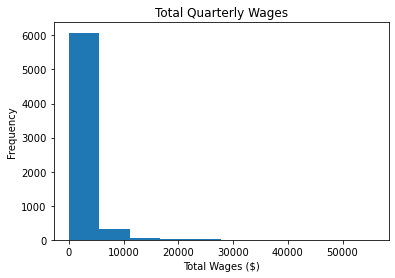

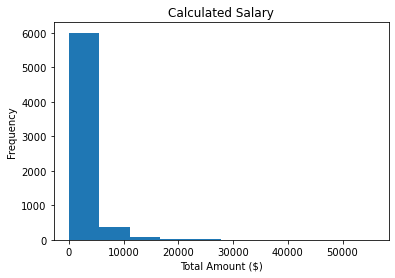

In [104]:
# comparing total wages
plt.hist(combined['total_wage'])
plt.title('Total Quarterly Wages')
plt.xlabel('Total Wages (\$)')
plt.ylabel('Frequency')
plt.savefig('graphs/1_total_wages_cleaned.png', dpi=300, bbox_inches='tight')
plt.show()

# and calculated salary
plt.hist(combined['calculated_salary'])
plt.title('Calculated Salary')
plt.xlabel('Total Amount (\$)')
plt.ylabel('Frequency')
plt.savefig('graphs/2_calculated_salary_cleaned.png', dpi=300, bbox_inches='tight')
plt.show()

#### Box Plots: Total Wages, Total Tips

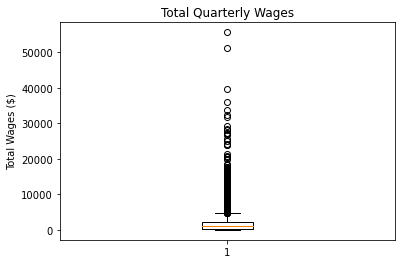

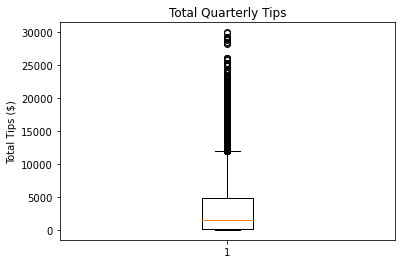

In [105]:
# boxplot: hours
fig1, ax1 = plt.subplots()
ax1.set_title('Total Quarterly Wages')
ax1.set_ylabel('Total Wages (\$)')
ax1.boxplot(combined['total_wage'])
plt.savefig('graphs/3_total_wages_cleaned_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# boxplot: wage rates
fig1, ax1 = plt.subplots()
ax1.set_title('Total Quarterly Tips')
ax1.set_ylabel('Total Tips (\$)')
ax1.boxplot(combined['total_tips'])
plt.savefig('graphs/4_total_tips_cleaned_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

#### Box Plots: Hourly Rate Avg, Tips Avg

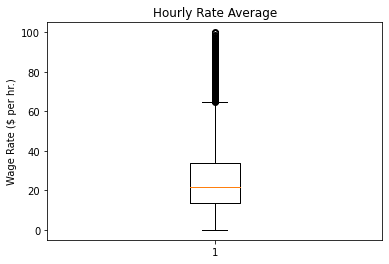

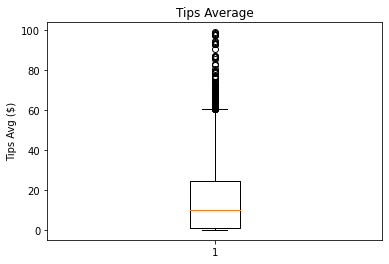

In [106]:
# boxplot: hourly rate avg
fig1, ax1 = plt.subplots()
ax1.set_title('Hourly Rate Average')
ax1.set_ylabel('Wage Rate (\$ per hr.)')
ax1.boxplot(combined['hourly_rate_avg'])
plt.savefig('graphs/5_hourly_rate_avg_cleaned.png', dpi=300, bbox_inches='tight')
plt.show()

# boxplot: tips avg
fig1, ax1 = plt.subplots()
ax1.set_title('Tips Average')
ax1.set_ylabel('Tips Avg (\$)')
ax1.boxplot(combined['tips_avg'])
plt.savefig('graphs/6_tips_avg_cleaned.png', dpi=300, bbox_inches='tight')
plt.show()

#### Summary Statistics

In [107]:
# checking ranges for hours worked
combined[['hours_worked', 'hourly_rate_emp', 'total_wage', 'total_tips', 'hourly_rate_avg', 'tips_avg']].describe().round(2)

,hours_worked,hourly_rate_emp,total_wage,total_tips,hourly_rate_avg,tips_avg
count,6510.00,6510.00,6510.00,6510.00,6510.00,6510.00
mean,208.14,10.92,1843.47,3501.21,25.09,15.10
std,178.59,25.53,2902.29,4757.38,18.47,16.69
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,55.00,5.00,331.50,185.25,13.45,0.75
50%,162.00,6.00,990.00,1504.75,21.94,10.03
75%,340.00,12.60,2148.43,4888.89,34.00,24.70
max,990.00,559.90,55620.00,29916.00,99.98,99.03


#### Box Plots: Hours Worked, Wage Rates

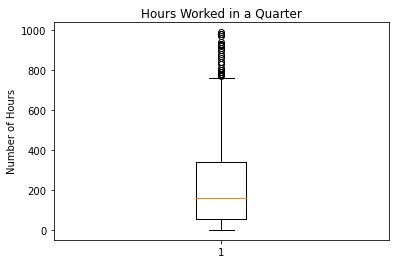

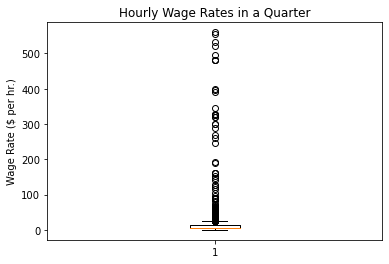

In [108]:
# boxplot: hours
fig1, ax1 = plt.subplots()
ax1.set_title('Hours Worked in a Quarter')
ax1.set_ylabel('Number of Hours')
ax1.boxplot(combined['hours_worked'])
plt.savefig('graphs/7_hours_worked_cleaned.png', dpi=300, bbox_inches='tight')
plt.show()

# boxplot: wage rates
fig1, ax1 = plt.subplots()
ax1.set_title('Hourly Wage Rates in a Quarter')
ax1.set_ylabel('Wage Rate (\$ per hr.)')
ax1.boxplot(combined['hourly_rate_emp'])
plt.savefig('graphs/8_hourly_rate_emp_cleaned.png', dpi=300, bbox_inches='tight')
plt.show()

#### Scatter: Hourly Wage vs. Hours Worked

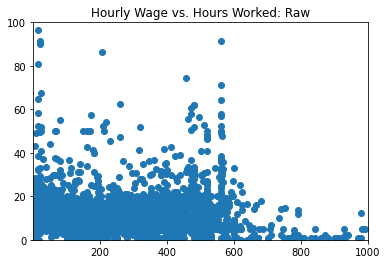

In [109]:
# should consider a binned scatter plot
plt.scatter(combined['hours_worked'], combined['hourly_rate_emp'])
plt.title('Hourly Wage vs. Hours Worked: Raw')
plt.xlim(1,1000)
plt.ylim(0,100)
plt.savefig('graphs/9_scatterplot.png', dpi=300, bbox_inches='tight')
plt.show()

## Saving adjusted data

In [110]:
# outputting adjusted data
combined.to_csv('2_cleaned_data_edited.csv', index=False)